In [125]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# !python --version

In [126]:
m = 10**6
n = 2
theta = np.array([[3], [1], [2]])
x1 = np.random.normal(3, 4, m)
x2 = np.random.normal(-1, 4, m)
x = np.stack((np.ones(m), x1, x2), axis=1).reshape((m, n+1, 1))

noise = np.random.normal(0, 2, m).reshape((m, 1))

# s = x1
# mu = 3
# sigma = 4
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')
# plt.show()

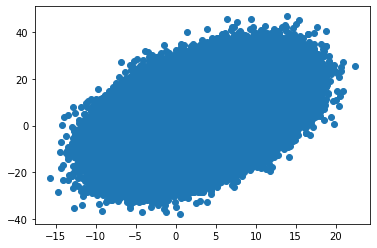

In [127]:
np.random.shuffle(x)
y = np.matmul(theta.T, x)
plt.scatter(x[:,1,:], y)
plt.show()

In [128]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

In [129]:
def cost(y, x, theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [133]:
def stochastic_gradient_descent(learning_rate, r, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_cost = cost(y, x, theta)
    k = 0
#     thetas_and_costs = []
#     thetas_and_costs.append((theta, prev_cost))
    
    while True:
    
        for b in range(int(m/r)):
            theta_t = theta.copy()
            
            for j in range(n+1):
                summation = 0
                for k in range(r):
                    ik = b*r + k
                    summation += (y[ik] - hypothesis(theta_t, x[ik])) * x[ik][j]
                theta[j] = theta[j] + (learning_rate * summation)
                
            curr_cost = cost(y, x, theta)
            print(b, t, theta, curr_cost)
            
            if abs(curr_cost - prev_cost) < epsilon:
                k += 1
            else:
                k = 0
            
            if k > 5 or t > 1500:
                return theta
#             prev_cost = curr_cost
            t += 1

In [134]:
theta = stochastic_gradient_descent(0.0001, 100, 1e-5)

0 0 [[0.0457762 ]
 [0.29593031]
 [0.29488475]] [[32.89218206]]
1 1 [[0.0822586 ]
 [0.53184391]
 [0.53287277]] [[23.05732523]]
2 2 [[0.11158493]
 [0.70337244]
 [0.7161787 ]] [[17.00363677]]
3 3 [[0.1373049 ]
 [0.83011219]
 [0.91583329]] [[12.25113228]]
4 4 [[0.16224908]
 [0.94264811]
 [1.04611429]] [[9.4155979]]
5 5 [[0.18418012]
 [1.02528926]
 [1.16403321]] [[7.40370385]]
6 6 [[0.20421008]
 [1.07590438]
 [1.29416817]] [[5.76015196]]
7 7 [[0.2208291 ]
 [1.10449966]
 [1.3761099 ]] [[4.89158925]]
8 8 [[0.2392075 ]
 [1.14056606]
 [1.47124886]] [[4.02746441]]
9 9 [[0.25752412]
 [1.16402087]
 [1.53978487]] [[3.50617455]]
10 10 [[0.27566122]
 [1.2004197 ]
 [1.59286618]] [[3.11381646]]
11 11 [[0.2937127 ]
 [1.21808197]
 [1.64285527]] [[2.83158907]]
12 12 [[0.31083342]
 [1.2399181 ]
 [1.67879579]] [[2.63863478]]
13 13 [[0.32605957]
 [1.25565699]
 [1.73388074]] [[2.43042345]]
14 14 [[0.34393193]
 [1.24980517]
 [1.77265554]] [[2.31790008]]
15 15 [[0.35802412]
 [1.25392498]
 [1.78692843]] [[2.2639

KeyboardInterrupt: 